# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

## Описание данных

* **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
* **balcony** — число балконов
* **ceiling_height** — высота потолков (м)
* **cityCenters_nearest** — расстояние до центра города (м)
* **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
* **first_day_exposition** — дата публикации
* **floor** — этаж
* **floors_total** — всего этажей в доме
* **is_apartment** — апартаменты (булев тип)
* **kitchen_area** — площадь кухни в квадратных метрах (м²)
* **last_price** — цена на момент снятия с публикации
* **living_area** — жилая площадь в квадратных метрах (м²)
* **locality_name** — название населённого пункта
* **open_plan** — свободная планировка (булев тип)
* **parks_around3000** — число парков в радиусе 3 км
* **parks_nearest** — расстояние до ближайшего парка (м)
* **ponds_around3000** — число водоёмов в радиусе 3 км
* **ponds_nearest** — расстояние до ближайшего водоёма (м)
* **rooms** — число комнат
* **studio** — квартира-студия (булев тип)
* **total_area** — общая площадь квартиры в квадратных метрах (м²)
* **total_images** — число фотографий квартиры в объявлении

## Загрузка необходимых для работы библиотек

In [231]:
# Установка библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [232]:
# Подключаем Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [233]:
import warnings
warnings.filterwarnings("ignore")

In [234]:
# Загружаем данные из файла в датафрейм. Выводим первые 20 строчек датафрейма data.

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/content/drive/MyDrive/Projects/Analysis_of_Apartment_Sale_Ads/datasets/real_estate_data.csv', sep='\t')

data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [235]:
# Изучаем общую информацию о полученном датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [236]:
# Выведем статистику для числовых столбцов в данных

np.round(data.describe(), 1).T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.9,5.7,0.0,6.0,9.0,14.0,50.0
last_price,23699.0,6541548.8,10887013.3,12190.0,3400000.0,4650000.0,6800000.0,763000000.0
total_area,23699.0,60.3,35.7,12.0,40.0,52.0,69.9,900.0
rooms,23699.0,2.1,1.1,0.0,1.0,2.0,3.0,19.0
ceiling_height,14504.0,2.8,1.3,1.0,2.5,2.6,2.8,100.0
floors_total,23613.0,10.7,6.6,1.0,5.0,9.0,16.0,60.0
living_area,21796.0,34.5,22.0,2.0,18.6,30.0,42.3,409.7
floor,23699.0,5.9,4.9,1.0,2.0,4.0,8.0,33.0
kitchen_area,21421.0,10.6,5.9,1.3,7.0,9.1,12.0,112.0
balcony,12180.0,1.2,1.1,0.0,0.0,1.0,2.0,5.0


In [237]:
# Проверим наличие явных дубликатов

print('Число дубликатов:', data.duplicated().sum())

Число дубликатов: 0


In [238]:
# Проверим наличие пропусков

data.isna().mean().round(2)

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height          0.39
floors_total            0.00
living_area             0.08
floor                   0.00
is_apartment            0.88
studio                  0.00
open_plan               0.00
kitchen_area            0.10
balcony                 0.49
locality_name           0.00
airports_nearest        0.23
cityCenters_nearest     0.23
parks_around3000        0.23
parks_nearest           0.66
ponds_around3000        0.23
ponds_nearest           0.62
days_exposition         0.13
dtype: float64

#### Строим общую гистограмму для всех числовых столбцов таблицы.

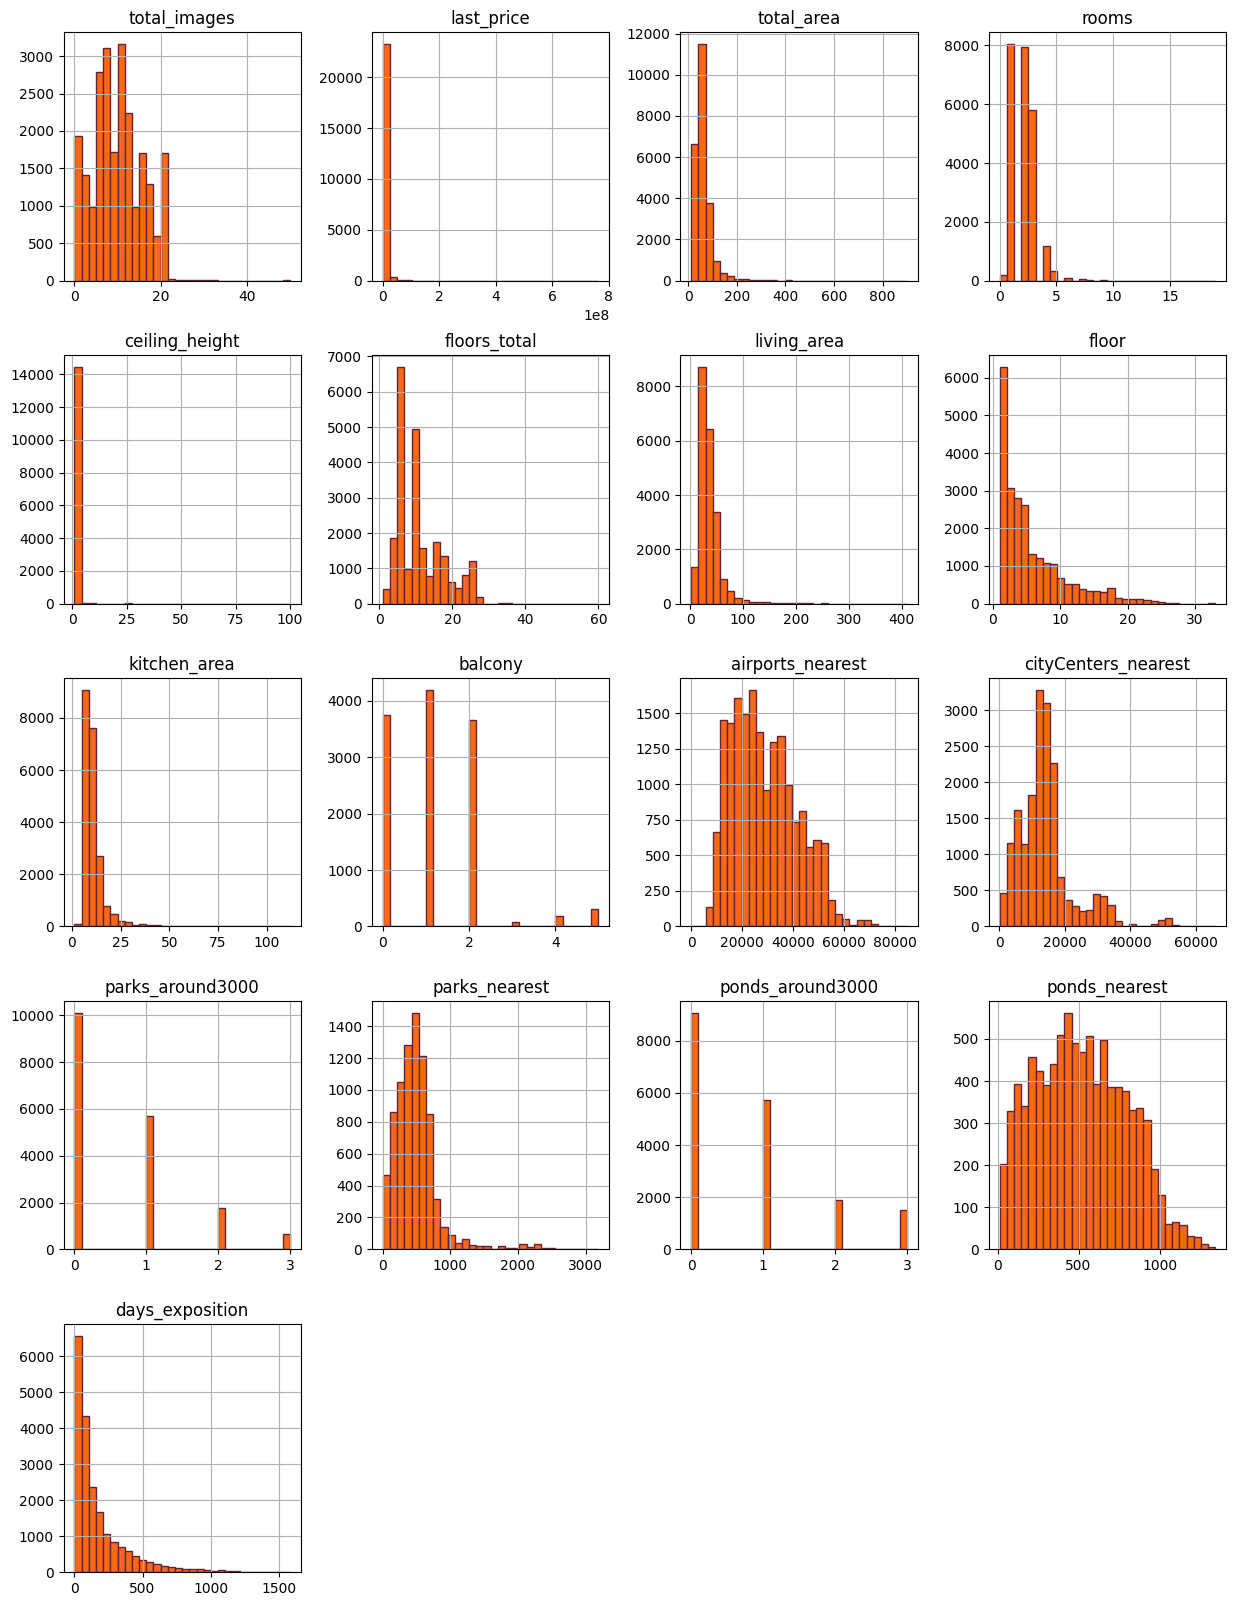

In [239]:
data.hist(bins=30, figsize=(15, 20), color='#FA6814', ec='#5e233d');

************

**Вывод:**
1. В ряде столбцов наблюдаются пропуски. Для того чтобы решить как поступать с ними необходимо   преположить причину их появления.
2. Некорректно указаны типы данных:
   first_day_exposition - object (заменить на datatype);
   floors_total, balcony, parks_around3000, ponds_around3000, days_exposition - float64 (заменить на    int64);
   is_apartment - object (заменить на bool).
3. Не обнаруженно явных дубликатов.
4. По гистограммам наблюдаются аномальные значения. Например, высота потолков 1 или 100 метров, прощадь квартиры 900 кв.м. или кухни 112 кв.м. Нужно проверить что из этого является ошибкой.

Приведено очень мало данных по столбцам  parks_nearest (8079) и ponds_nearest (9110), вероятно это поле было необязательным для заполнения. В случае, если это важный параметр необходимо сделать поле обязательным.

***********

### Предобработка данных

 <span style="color:#100db5">**total_images (число фотографий в объявлении)** </span>

Пропусков нет. Обычно от 0 до 24 фотографий, максимальное количество 50.

 <span style="color:#100db5">**last_price (цена на момент снятия с публикации)** </span>

Пропусков нет.

<span style="color:#100db5">**total_area (общая площадь квартиры в квадратных метрах)** </span>

Пропусков нет. В среднем квартиры по 60 кв.м., однако встречаются и по 900 кв.м., вероятно это ошибка в данных.

In [240]:
# Выведем статистику по столбцу 'total_area'

data['total_area'].describe().round(1)

count    23699.0
mean        60.3
std         35.7
min         12.0
25%         40.0
50%         52.0
75%         69.9
max        900.0
Name: total_area, dtype: float64

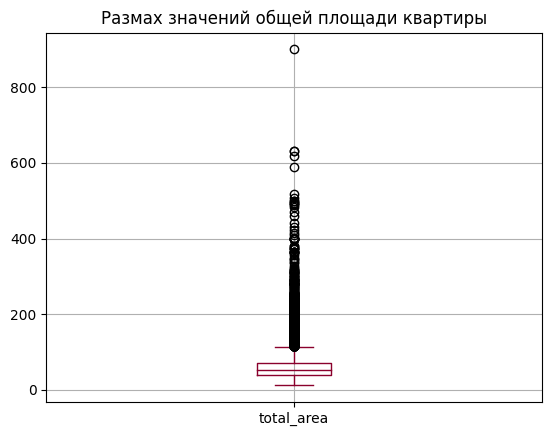

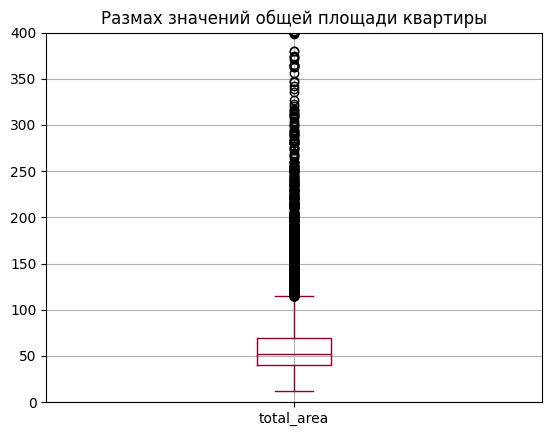

In [241]:
# Создаем ящик с усами для данных о общей площади квартир

data.boxplot(column='total_area', color='#8a012d')
plt.title('Размах значений общей площади квартиры')
plt.show()

data.boxplot(column='total_area', color='#8a012d')
plt.title('Размах значений общей площади квартиры')
plt.ylim(0, 400)
plt.show()

In [242]:
# Фильтруем данные, оставляя только те строки, где значение total_area меньше 320

data = data.query('total_area < 320')

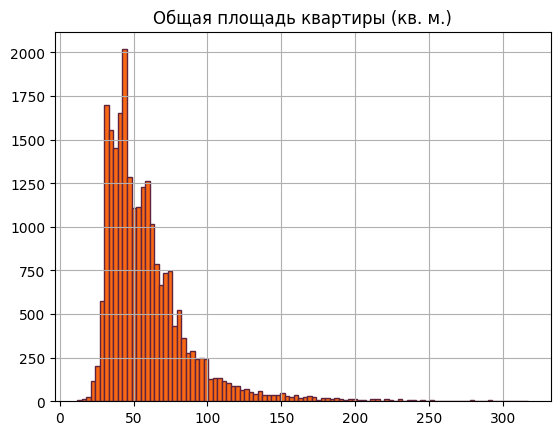

In [243]:
# Построим гистограмму для столбца 'total_area'

data['total_area'].hist(bins=100, color='#FA6814', ec='#5e233d')
plt.title('Общая площадь квартиры (кв. м.)');

Удалили данные о квартирах с жилой площадью больше 320 метров.

 <span style="color:#100db5">**first_day_exposition (дата публикации)**</span>

Пропусков нет. Нужно поменять тип на datatype.

In [244]:
# Конвертируем столбец 'first_day_exposition' в формат datetime

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

 <span style="color:#100db5">**rooms (число комнат)**</span>

Пропусков нет. В среднем квартиры двухкомнатные, максимальное количество комнат - 19.

In [245]:
# Выведем статистику по столбцу 'rooms'

data['rooms'].describe().astype(int)

count    23650
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         16
Name: rooms, dtype: int64

In [246]:
# Вычислим среднее значение количества комнат

data['rooms'].mean().round(1)

2.1

In [247]:
# Вычислим медианное значение количества комнат

data['rooms'].median()

2.0

In [248]:
# Создадим сводную таблицу для анализа данных по количеству комнат и общей площади

data.pivot_table(index='rooms', values='total_area', aggfunc='count')

,total_area
rooms,
0,196
1,8046
2,7940
3,5813
4,1177
5,315
6,98
7,43
8,9


Доля квартир у которых больше 7 комнат - 0.1%. Вероятно, это реальные квартиры, но мы можем их удалить без потерь для информативности.

In [249]:
# Фильтруем данные, оставляя только те строки, где число комнат меньше 8

data = data.query('rooms < 8')

In [250]:
# Выведем статистику по столбцу 'rooms'

data['rooms'].describe().round(1)

count    23628.0
mean         2.1
std          1.0
min          0.0
25%          1.0
50%          2.0
75%          3.0
max          7.0
Name: rooms, dtype: float64

В таблице приводятся данные о квартирах с нулевым числом комнат. Обычно студии имеют площадь меньше 22 кв. м. Так, можно перезаписать количество комнат с 0 на 1, для квартир с общей площадью больше 22 кв.м.

In [251]:
rows = (data['rooms'] == 0) & (data['total_area'] > 25)
data.loc[rows, 'rooms'] = 1

In [252]:
data.pivot_table(index='rooms', values='total_area', aggfunc='count')

,total_area
rooms,
0,78
1,8164
2,7940
3,5813
4,1177
5,315
6,98
7,43


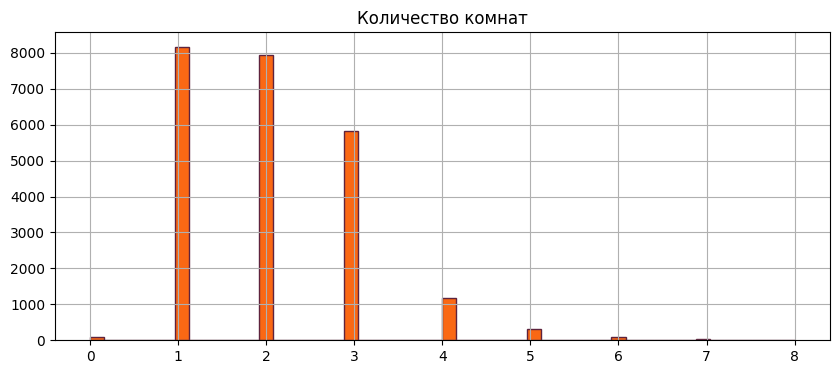

In [253]:
# Построим гистограмму распределения количества комнат

data['rooms'].hist(bins=50, range=(0, 8), figsize=(10, 4), color='#FA6814', ec='#5e233d')
plt.title('Количество комнат');

 <span style="color:#100db5">**ceiling_height (высота потолков (м))**</span>

В данных обнаружено 9195 пропусков. С данными не все в порядке, потому что в таблице есть данные о квартирах с потолком на высоте 1 метр и 100 метров.

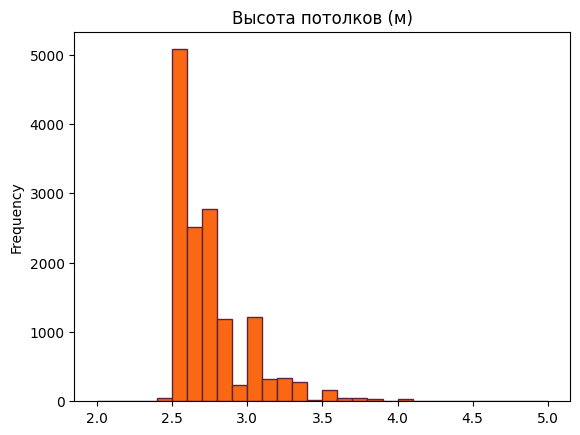

In [254]:
# Построим гистограмму распределения высоты потолков

(
    data['ceiling_height']
    .plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5), color='#FA6814', ec='#5e233d')
)
plt.title('Высота потолков (м)');

Большинство квартир имеют высоту потолков от 2.5 до 3 метров.

Вероятно, что с отдалением от центра города потолки будут становиться ниже. Чтобы проверить эту теорию будем категоризировать квартиры.

* 0 - 2 км от центра (категория 'центр')
* 2 - 6 км от центра (категория ' близко центру')
* 6 - 13 км от центра (категория 'в черте города')
* дальше 13 км от центра (категория 'область')

In [255]:
# Функция для заполнения пропущенных значений высоты потолков в зависимости от расстояния до центра города.

def ceiling_height_fillna(row):
    if row['cityCenters_nearest'] < 2000:
        return 'центр'
    elif row['cityCenters_nearest'] < 6000:
        return 'близко центру'
    elif row['cityCenters_nearest'] < 13000:
        return 'в черте города'
    elif row['cityCenters_nearest'] >= 13000:
        return 'область'

In [256]:
# Добавим новый столбец 'dist_from_center_category' к датафрейму 'data'
# используя функцию 'ceiling_height_fillna' для заполнения пропущенных значений в этом столбце
# выведем первые строки трех столбцов: 'locality_name', 'cityCenters_nearest' и 'dist_from_center_category'

data['dist_from_center_category'] = data.apply(ceiling_height_fillna, axis=1)
data[['locality_name', 'cityCenters_nearest', 'dist_from_center_category']].head()

,locality_name,cityCenters_nearest,dist_from_center_category
0,Санкт-Петербург,16028.0,область
1,посёлок Шушары,18603.0,область
2,Санкт-Петербург,13933.0,область
3,Санкт-Петербург,6800.0,в черте города
4,Санкт-Петербург,8098.0,в черте города


In [257]:
# Группируем данные по категориям и вычисляем среднюю высоту потолков,
# затем сортируем результаты по убыванию и преобразуем их в DataFrame

(
    data
    .groupby('dist_from_center_category')['ceiling_height']
    .mean()
    .sort_values(ascending=False)
    .to_frame()
)

,ceiling_height
dist_from_center_category,
центр,3.226937
близко центру,3.147284
в черте города,2.770350
область,2.673701


In [258]:
# Создаем список расстояний от центра
dist_from_center_list = ['центр', 'близко центру', 'в черте города', 'область']

# Проходим по каждому расстоянию из списка и заполняем пропущенные значения высоты потолков
for location in dist_from_center_list:
    data['ceiling_height'] = (
        data.groupby('dist_from_center_category')['ceiling_height']
        .apply(lambda x: x.fillna(x.mean()))
    )

<span style="color:#100db5">**floors_total (всего этажей в доме)**</span>

От 1 этажа до 60, в среднем дома по 10 этажей. Присутствует 86 пропусков. Причина появления пропусков непонятна, возможно это просто пропущенные данные. Оставим эти значения как есть.

In [259]:
# Заполняем отсутствующие значения в 'floors_total' нулями и преобразуем в целые числа

data['floors_total'] = data['floors_total'].fillna(0).astype('int')

<span style="color:#100db5">**living_area (жилая площадь в м²)**</span>

В данных встречается 1903 пропуска. В среднем жидая площадь равна 34 кв.м., однако есть квартиры и по 409 кв.м. Это поле могло быть необязательным, что привело к пропущенному значению.
Заполнять пропущенные значения средними было бы некоректно, потому что в одном районе могут быть квартиры с кухнями совершенно разного размера.

In [260]:
# Получаем краткую описательную статистику для столбца 'living_area'

data['living_area'].describe().round(1)

count    21738.0
mean        34.0
std         19.7
min          2.0
25%         18.6
50%         30.0
75%         42.2
max        250.0
Name: living_area, dtype: float64

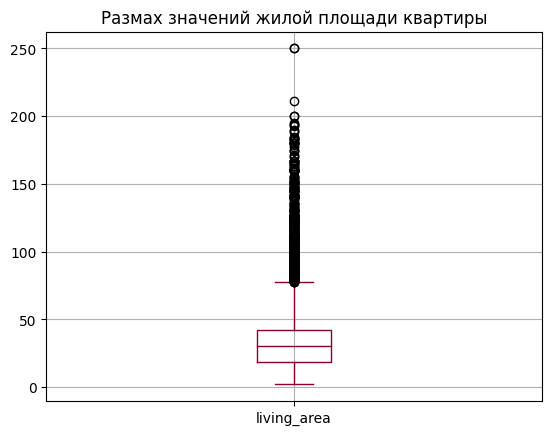

In [261]:
# Посмотрим размах значений жилой площади квартиры

data.boxplot(column='living_area', color='#8a012d')
plt.title('Размах значений жилой площади квартиры')
plt.show()

In [262]:
# Фильтруем данные, оставляя только те строки, где площадь жилых помещений меньше 150 квадратных метров

data = data.query('living_area < 150')

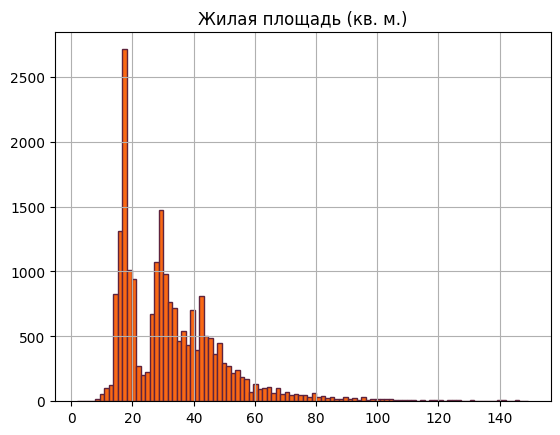

In [263]:
# Построим гистограмму жилой площади

data['living_area'].hist(bins=100, color='#FA6814', ec='#5e233d')
plt.title('Жилая площадь (кв. м.)');

Удалили данные о квадрирах с жилой площадью больше 150 метров.

 <span style="color:#100db5">**floor (этаж)**</span>

Квартиры продаются с первого по 33 этажи. Напонятно почему нет квартир с 34 по 60 этажи. Пропусков нет.      

 <span style="color:#100db5">**is_apartment (апартаменты)** </span>

20924 пропусков, это большая часть. Вероятно, пропущенные значения это False. Вероятно это поле было не обязательным для заполнения. Необходимо поменять тип данных с object на bool.

In [264]:
# Заполненим пропуски в столбце 'is_apartment' значением False

data['is_apartment']=data['is_apartment'].fillna(False)

Теперь у столбца is_apartment тип данных bool.

 <span style="color:#100db5">**studio (студия)** </span>


Нет пропусков.        

<span style="color:#100db5">**open_plan (свободная планировка)**</span>


Нет пропусков.  

 <span style="color:#100db5">**kitchen_area (площадь кухни в м²)**</span>

2278 пропуска. В среднем кухни по 10 метров, однако встречаются кухни по 112 метров. Вероятно пропуски могут означать отсутствие кухни как отдельного помещения, например в студиях. Кроме того это поле могло быть необязательным, что привело к пропущенному значению.
Заполнять пропущенные значения средними было бы некоректно, потому что в одном районе могут быть квартиры с кухнями совершенно разного размера.

In [265]:
# Получим статистику для столбца 'kitchen_area'

data['kitchen_area'].describe().round(1)

count    20860.0
mean        10.4
std          5.5
min          1.3
25%          7.0
50%          9.0
75%         12.0
max        107.0
Name: kitchen_area, dtype: float64

In [266]:
# Оставляем строки с площадью кухни от 4 до 40 квадратных метров

data = data.query('kitchen_area < 40')
data = data.query('kitchen_area > 4')

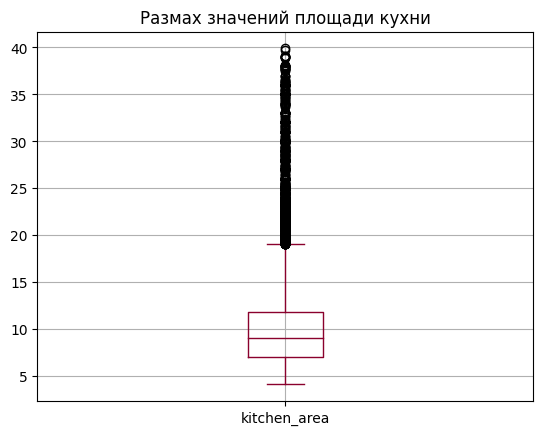

In [267]:
# Визуализация размаха значений площади кухни

data.boxplot(column='kitchen_area', color='#8a012d')
plt.title('Размах значений площади кухни')
plt.show()

In [268]:
# Снова получим статистику для столбца 'kitchen_area'

data['kitchen_area'].describe().round(1)

count    20689.0
mean        10.2
std          4.6
min          4.1
25%          7.0
50%          9.0
75%         11.8
max         39.9
Name: kitchen_area, dtype: float64

Диаграмма размаха показывает, что нормальные значения до 18 кв.м., однако могут быть квартиры со свободной планировкой, где комната объединена с зоной кухни. Предположим что площадь таких помещений может быть от 4 до 40 кв. м.  Помещения больших размеров не реалистичны. Вероятно причиной появления кухонь площадью до 100 кв.м. была потерянная запятая. Однако, счиатаю, что исправлять эти значения будет неправильно, потому что мы не знаем наверняка.

 <span style="color:#100db5">**balcony (число балконов)** </span>
    
11519 пропусков. Обычно в квартирах 1-2 балкона. Возможно пропуски значат отсутствие балкона. Заменим пропуски в balcony на 0 и изменим тип данных на int.

In [269]:
# Заполняем пропущенные значения в столбце 'balcony' нулями и преобразуем тип данных к целочисленному

data['balcony'] = data['balcony'].fillna(0).astype('int')

<span style="color:#100db5">**locality_name (название населённого пункта)** </span>

39 пропусков, скорее всего пропуски образовались из-за ошибки при выгрузке данных. Маловероятно, что это поле было не обязательным. Заменим пропущенные названия на 'неизвестно'.

In [270]:
# Подсчитывает количество пропущенных значений в столбце 'locality_name'

data['locality_name'].isna().sum()

39

In [271]:
# Заменяем отсутствующие значения в столбце 'locality_name' на строку 'неизвестно'

data['locality_name'].fillna('неизвестно')

0                  Санкт-Петербург
1                   посёлок Шушары
2                  Санкт-Петербург
5        городской посёлок Янино-1
6                посёлок Парголово
                   ...            
23692                       Тихвин
23693                     Петергоф
23694              Санкт-Петербург
23695                        Тосно
23698          поселок Новый Учхоз
Name: locality_name, Length: 20689, dtype: object

Теперь, когда пропуски исправлены надо привести названия к общему виду и удалить дубликаты.

In [272]:
# Получаем количество уникальных значений в столбце 'locality_name'

data['locality_name'].nunique()

345

In [273]:
# Получаем уникальные значения из столбца 'locality_name' в датасете data и сохраняем их в переменную name

name = data['locality_name'].unique()
name

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Колпино', 'Гатчина',
       'поселок Мурино', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Кировск', 'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'село Путилово', 'Ивангород', 'Мурино',
       'Сланцы', 'Шлиссельбург', 'Сясьстрой', 'Никольское', 'Зеленогорск',
       'Сосновый Бор',

In [274]:
# Предобработка столбца 'locality_name'

data['locality_name'] = data['locality_name'].fillna(value='неизвестно')
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].str.lower()
data = data.drop_duplicates()
data['locality_name'].nunique()

312

In [275]:
# Создадим словарь replace_name_dict с соответствиями
replace_name_dict = {
    'городской поселок': 'поселок',
    'коттеджный поселок': 'поселок',
    'поселок городского типа': 'поселок',
    'поселок станции': 'поселок',
    'садовое товарищество': 'поселок',
    'деревня': 'поселок',
    'поселок при железнодорожной станции': 'поселок',
}

# Функция принимает название населенного пункта и выполняет замену согласно словарю 'replace_name_dict'
def replace_name(name):
    for key, value in replace_name_dict.items():
        name = name.replace(key, value)
    return name


# Применяем функцию `replace_name` ко всем значениям столбца 'locality_name'
data['locality_name'] = data['locality_name'].apply(replace_name)

In [276]:
# Получаем количество уникальных значений в столбце 'locality_name'

data['locality_name'].nunique()

292

<span style="color:#100db5">**airports_nearest (расстояние до ближайшего аэропорта в метрах)** </span>


5542 пропуска. 50% домов находятся на расстоянии меньше 28 км от аэропорта, максимальное расстояние 84 км. Скорее всего эти данные просто не были заполнены, например если поле было необязательным. Эти пропуски оставим без изменений.

<span style="color:#100db5">**cityCenters_nearest (расстояние до центра города в метрах)** </span>

5519 пропуска. 75% домов находятся видимо в черте города (16 км), однако есть предложения в пригороде (66 км). Скорее всего эти данные просто не были заполнены, например если поле было необязательным. Эти пропуски оставим без изменений.

Либо считать что все квартиры находятся в Питере, потому что протяжённость Петербурга в административных границах: с севера на юг в пределах КАД — 32 км (за пределами КАД — 52 км), с северо-запада на юго-восток за пределами КАД,— около 90 км.

In [277]:
# Заполненим пропущенные значения в столбце 'cityCenters_nearest' нулями и преобразуем тип данных в целочисленный

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0).astype('int')

<span style="color:#100db5">**parks_around3000 (число парков в радиусе 3 км)** </span>

5518 пропусков. Интересно, что число пропусков совпадает с числом пропусков в столбце ponds_around3000. Кроме того очень похоже на airports_nearest (5542 пропуска) и cityCenters_nearest (5519 пропусков). Эти данные просто могли быть не заполнены. Эти пропуски оставим без изменений.

In [278]:
# Заполненим пропущенные значения в столбце 'parks_around3000' нулями и преобразуем тип данных в целочисленный

data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

<span style="color:#100db5">**parks_nearest (расстояние до ближайшего парка в метрах)**</span>

15620 пропусков. В среднем до ближайшего парка приходится идти пол километра. Возможно пропуски значат отсутствие парка или это просто ошибка в данныхб кроме того эти данные просто могли быть не заполнены. Эти пропуски оставим без изменений.

<span style="color:#100db5">**ponds_around3000  (число водоемов в радиусе 3 км)** </span>
5518 пропусков. Интересно, что число пропусков совпадает с числом пропусков в столбце parks_around3000. Кроме того очень похоже на airports_nearest (5542 пропуска) и cityCenters_nearest (5519 пропусков). Эти данные просто могли быть не заполнены. Эти пропуски оставим без изменений.

In [279]:
# Заполненим пропущенные значения в столбце 'ponds_around3000' нулями и преобразуем тип данных в целочисленный

data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

<span style="color:#100db5">**ponds_nearest (расстояние до ближайшего водоёма в метрах)** </span>

14589 пропусков. В среднем на расстоянии полукилометра от домов можно найти пруд. Возможно пропуски значат отсутствие пруда или это просто ошибка в данных, кроме того эти данные просто могли быть не заполнены. Эти пропуски оставим без изменений.

<span style="color:#100db5">**days_exposition (сколько дней было размещено объявление)** </span>

3181 пропусков.Вид гистограммы выглядит как распределение Пуассона. В среднем объявления на сайте находятся меньше полугода, однако встречаются объявления о продаже, которым 5 лет. Вероятно это не актуальные объявления или с завышенной стоимостью.

In [280]:
# Заполненим пропущенные значения в столбце 'days_exposition' нулями и преобразуем тип данных в целочисленный

data['days_exposition'] = data['days_exposition'].fillna(0).astype('int')

In [281]:
# Выведем информацию о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20689 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   total_images               20689 non-null  int64         
 1   last_price                 20689 non-null  float64       
 2   total_area                 20689 non-null  float64       
 3   first_day_exposition       20689 non-null  datetime64[ns]
 4   rooms                      20689 non-null  int64         
 5   ceiling_height             16050 non-null  float64       
 6   floors_total               20689 non-null  int64         
 7   living_area                20689 non-null  float64       
 8   floor                      20689 non-null  int64         
 9   is_apartment               20689 non-null  bool          
 10  studio                     20689 non-null  bool          
 11  open_plan                  20689 non-null  bool          
 12  kitc

***************

**Вывод:**
1. Рассмотрели каждый из столбцов, что дало представление о содержимом таблицы.
2. По возможности были удалены пропуски и заменены на подходящие значения.
3. Провели категоризацию высоты потолков в зависимости от расстояния от центра города. Заполнили недостающие значения средними по каждой из категорий.
4. Изменили тип данных там где это было необходимо.
5. Данные в столбце locality_name привели к общему виду, заменили синонимы слова поселок, заменили букву ё на е, привели к единому регистру.

Для будущего более детального исследования можно детализировать данные: уточнить информацию о количестве парков, прудов, расстоянию до центра и до ближайшего аэропорта.

************************


## Добавим в таблицу новые столбцы

In [282]:
# Вычислим и добавим в таблицу цену одного квадратного метра

data['meter_price'] = (data['last_price']/data['total_area'])

In [283]:
# Добавим в таблицу день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

In [284]:
# Добавим в таблицу месяц публикации объявления

data['month_exposition'] = data['first_day_exposition'].dt.month

In [285]:
# Добавим в таблицу год публикации объявления

data['year_exposition'] = data['first_day_exposition'].dt.year

In [286]:
# Добавим в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»)

data.loc[data['floor'] / data['floors_total'] < 1, 'floor_category'] = 'другой'
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'

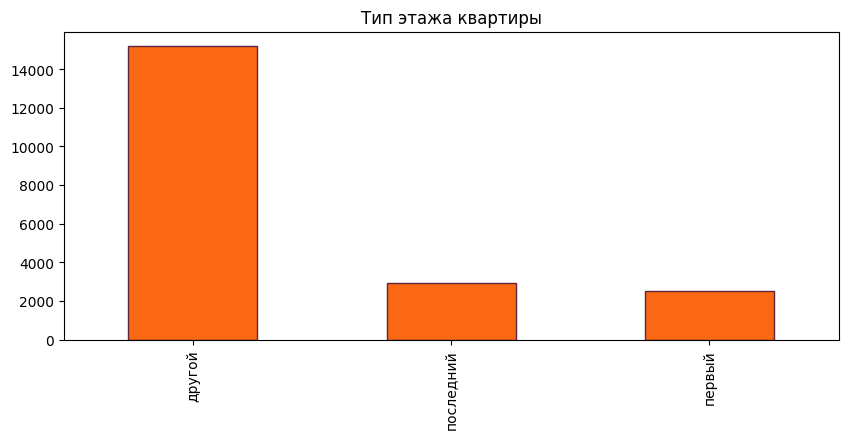

In [287]:
# Построение столбчатой диаграммы для типов этажей квартир

data['floor_category'].value_counts().plot.bar(figsize=(10, 4), color='#FA6814', ec='#5e233d')
plt.title('Тип этажа квартиры');

In [288]:
# Добавим в таблицу расстояние до центра города в километрах

data['city_centers_nearest_in_km'] = (data.cityCenters_nearest / 1000).astype('int64')

***********

**Вывод:** В таблицу добавлена информация:
* цена одного квадратного метра;
* день недели публикации объявления;
* год публикации объявления;
* тип этажа квартиры;
* расстояние до центра города в километрах.

*************

## Исследовательский анализ данных

### Изучим параметры объектов

**Общая площадь**

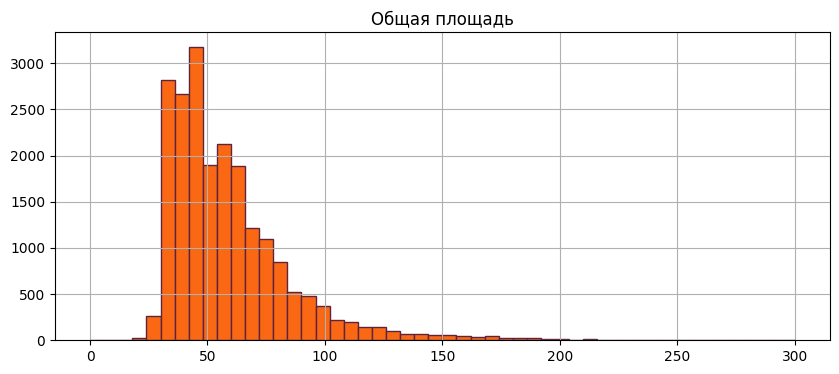

In [289]:
# Гистограмма общей площади

data['total_area'].hist(bins=50, range=(0, 300), figsize=(10, 4), color='#FA6814', ec='#5e233d')
plt.title('Общая площадь');

In [290]:
# Функция для расчета диапазона значений

def range_calc(data, total_area):
    q1 = data[total_area].quantile(0.25)
    q3 = data[total_area].quantile(0.75)
    iqr = q3 - q1  # Interquartile range
    fence_low = q1 - 1.5 * iqr
    fence_high = q3 + 1.5 * iqr
    return (fence_low, fence_high)

Text(0.5, 1.0, 'Общая площадь')

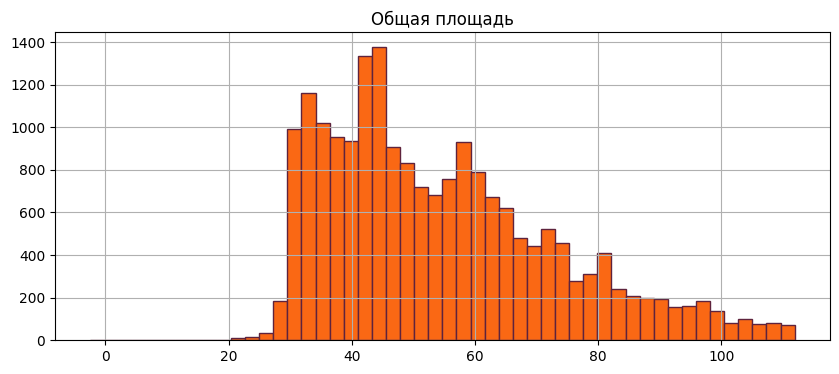

In [291]:
# Рассчитываем диапазон
range_tuple = range_calc(data, 'total_area')

# Строим гистограмму с новым диапазоном
data['total_area'].hist(bins=50, figsize=(10, 4), color='#FA6814', ec='#5e233d', range=range_tuple)
plt.title('Общая площадь')

Площадь большей части квартир меньше 100 метров.

**Жилая площадь**

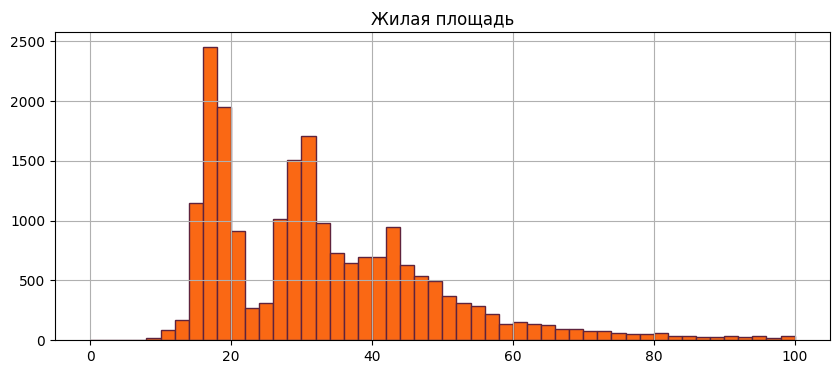

In [292]:
# Строим гистограмму распределения жилой площади

data['living_area'].hist(bins=50, range=(0, 100), figsize=(10, 4), color='#FA6814', ec='#5e233d')
plt.title('Жилая площадь');

На графике наблюдаются 3 пика, вероятно они относятся к однокомнатным, двухкомнатным и трехкомнатным квартирам.
Самые распространённые варианты с жилой площадью ~20 и ~35 метров.

**Площадь кухни**

In [293]:
# Выведем статистику по столбцу 'kitchen_area'

data['kitchen_area'].describe().round(1)

count    20689.0
mean        10.2
std          4.6
min          4.1
25%          7.0
50%          9.0
75%         11.8
max         39.9
Name: kitchen_area, dtype: float64

In [294]:
# Вычислим медианное значение столбца 'kitchen_area'

data['kitchen_area'].median()

9.0

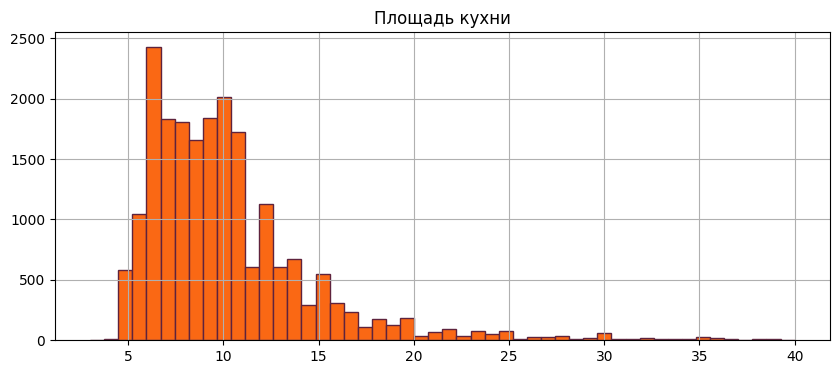

In [295]:
# Построим гистограмму для данных о площади кухни

data['kitchen_area'].hist(bins=50, range=(3, 40), figsize=(10, 4), color='#FA6814', ec='#5e233d')
plt.title('Площадь кухни');

Наблюдается очень большое воличество квартир с кухнями площадью 6-7 кв.м. Медианное значение 9.08, среднее 10.2.

**Цена объекта**

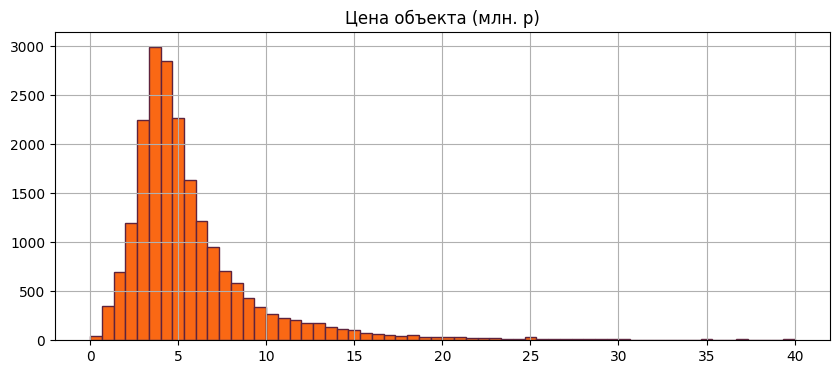

In [296]:
# Гистограмма цен недвижимости в млн. руб.

(
    (data['last_price']/1000000).
    hist(figsize=(10, 4), bins=60, range = (0, 40), color='#FA6814', ec='#5e233d')
)
plt.title('Цена объекта (млн. р)');

Большая часть квартир стоит около 5 миллионов рублей.

**Количество комнат**

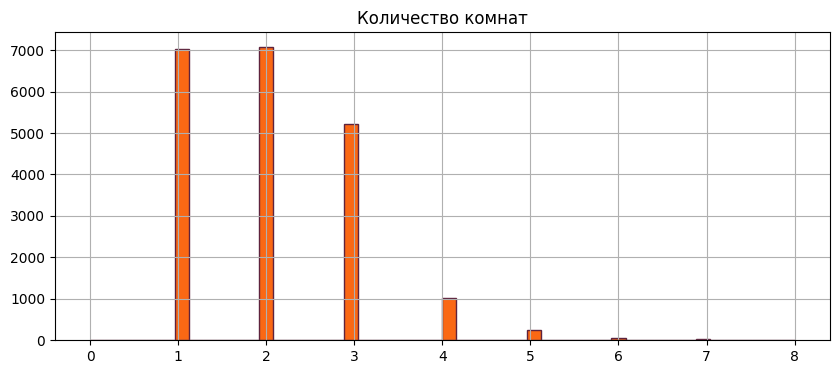

In [297]:
# Строим гистограмму распределения количества комнат в датасете

data['rooms'].hist(bins=50, range=(0, 8), figsize=(10, 4), color='#FA6814', ec='#5e233d')
plt.title('Количество комнат');

Однокомнатных и двухкомнатных квартир больше всего, их процент составляет 34.5% и 33.6%б соответственно Далее следуют трехкомнатные, которых 24.6%. Студий и квартир с большим количеством комнат совсем мало.

**Высота потолков**

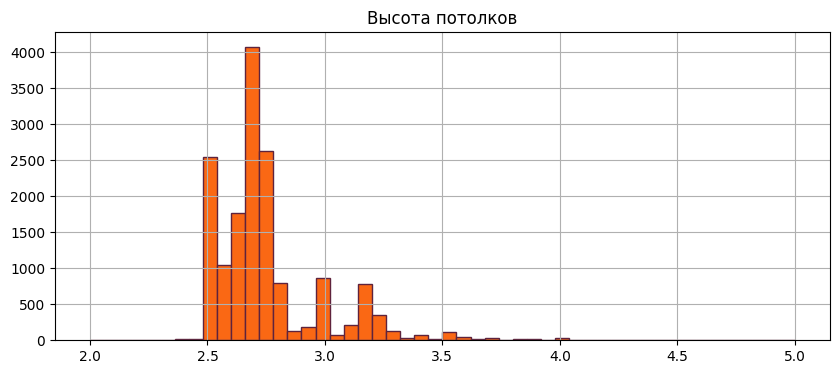

In [298]:
# Построим гистограмму высоты потолков

data['ceiling_height'].hist(bins=50, range=(2, 5), figsize=(10, 4), color='#FA6814', ec='#5e233d')
plt.title('Высота потолков');

У большинства квартир в таблице потолки высотой от 2.5 до 2.8 метров.

**Этаж квартиры**

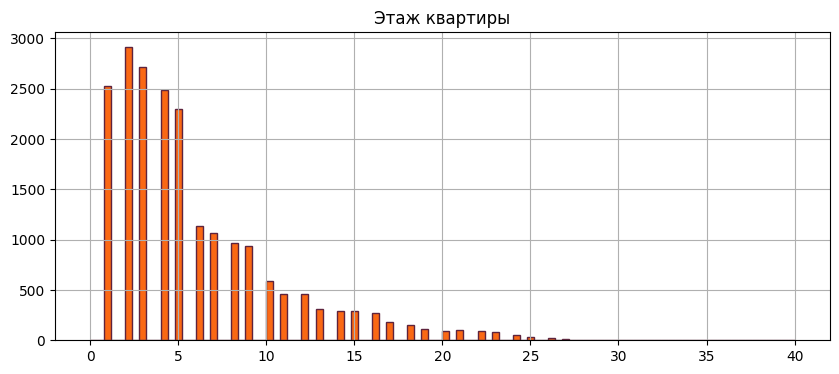

In [299]:
# Построим гистограмму количества этажей

data['floor'].hist(bins=100, range=(0, 40), figsize=(10, 4), color='#FA6814', ec='#5e233d')
plt.title('Этаж квартиры');

Очень много предложений квартир на 1 - 6 этажах. Санкт-Петербург имеет центр с низвоэтажной застройкой, можно предположить, что как раз квартиры из центра вносят такой значимый вклад. Высоких многоэтажек  в городе не так много, в основном они есть только в современных районах.

**Тип этажа квартиры («первый», «последний», «другой»)**

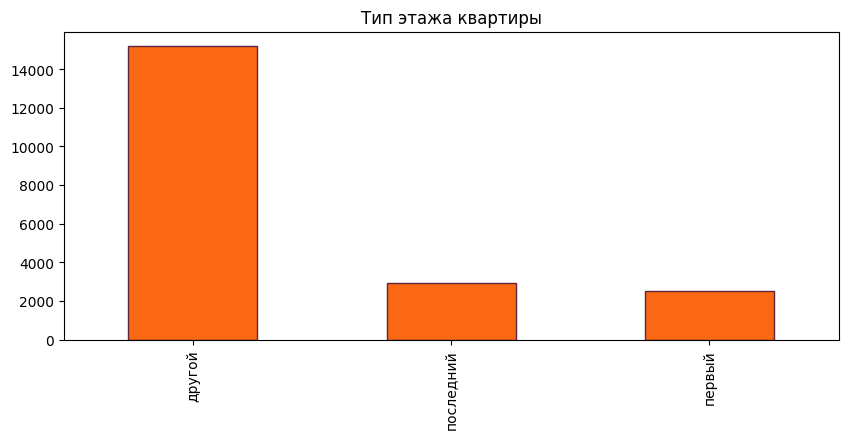

In [300]:
# Вычислим количество значений в столбце 'floor_category' и построим столбчатую диаграмму

data['floor_category'].value_counts().plot.bar(figsize=(10, 4), color='#FA6814', ec='#5e233d')
plt.title('Тип этажа квартиры');

На последнем этаже располагаются 14% квартир, 12% на первом. Остальные 74% на других этажах.

**Общее количество этажей в доме**

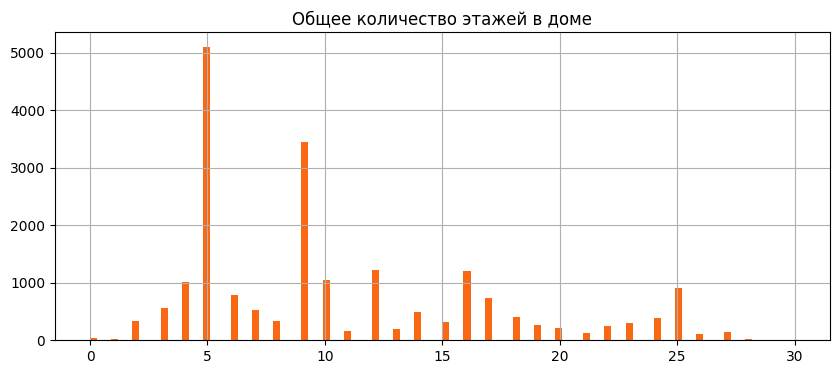

In [301]:
# Построим гистограмму количества этажей

data['floors_total'].hist(bins=100, range=(0, 30), figsize=(10, 4), color='#FA6814', )
plt.title('Общее количество этажей в доме');

Среди домов в которых продаются квартиры больше всего пятиэтажных и девятиэтажных домов. Это выглядит достаточно правдоподобно. Есть значительное количесто домов с 25 этажами, больше - это скорее редкость.

**Расстояние до центра города в метрах**

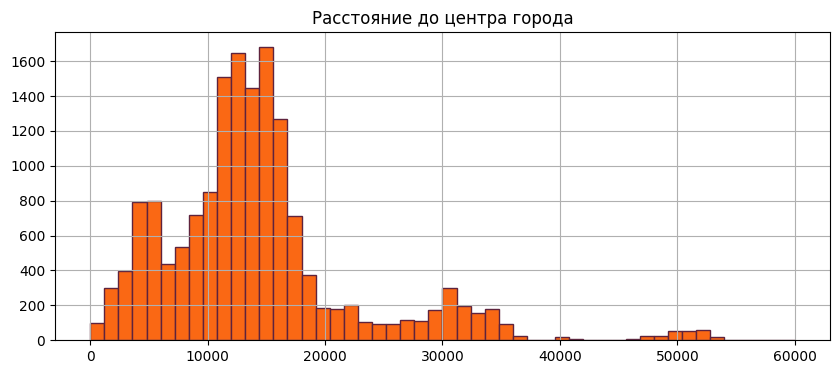

In [302]:
# Построим гистограмму распределения данных о расстоянии до центра города

(
    data['cityCenters_nearest']
    .hist(bins=50, range=(1, 60000), figsize=(10, 4), color='#FA6814', ec='#5e233d')
)
plt.title('Расстояние до центра города');

Большое количество домов расположены на расстоянии примерно 5 км от центра, однако основная масса домов расположена на расстоянии от 10 до 20 км от центра.

**Расстояние до ближайшего аэропорта**

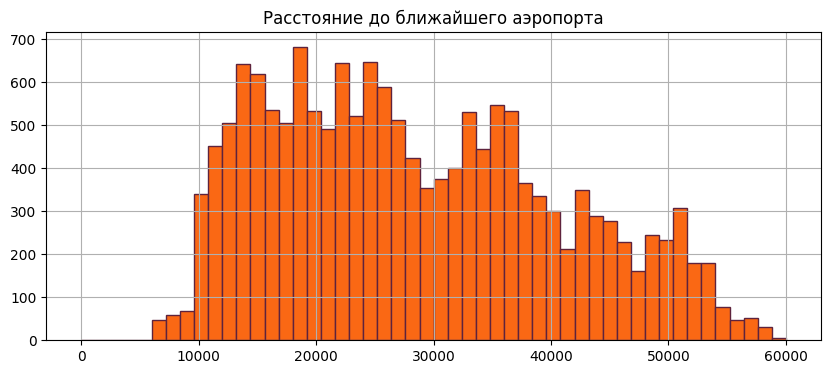

In [303]:
# Построим гистограмму распределения данных о расстоянии до ближайшего аэропорта

(
    data['airports_nearest']
    .hist(bins=50,range=(1, 60000), figsize=(10, 4), color='#FA6814', ec='#5e233d')
)
plt.title('Расстояние до ближайшего аэропорта');

Основной аэропорт города Санкт-Петербург - Пулково. Расстояние до него находится в широком диапазоне от 10 до 60 км.

**Расстояние до ближайшего парка**

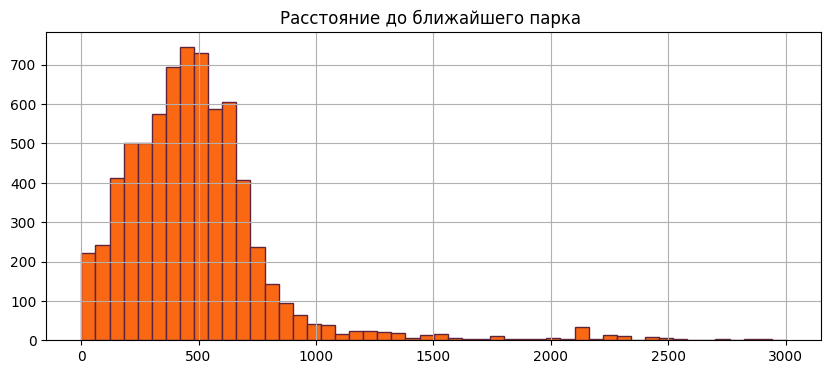

In [304]:
# Построим гистограмму распределения данных о расстоянии до ближайшего парка

(
    data['parks_nearest']
    .hist(bins=50,range=(1, 3000), figsize=(10, 4), color='#FA6814', ec='#5e233d')
)
plt.title('Расстояние до ближайшего парка ');

В большинстве случаев на расстоянии меньше 700 метров можно найти парк.

**День и месяц публикации объявления**

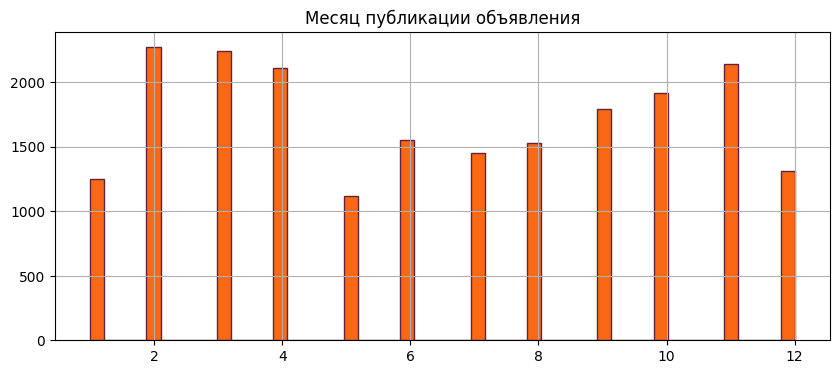

In [305]:
# Создание гистограммы распределения месяца публикации объявлений

data['month_exposition'].hist(bins=50,range=(1, 12), figsize=(10, 4), color='#FA6814', ec='#5e233d')
plt.title('Месяц публикации объявления');

Создается впечатление, что в мае и летом активность в публикации объявлений падает. Вероятно люди отдают преоретет в теплое время другим занятиям.

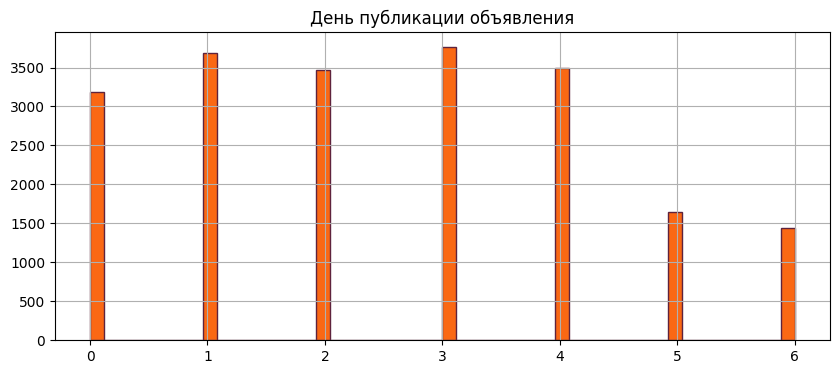

In [306]:
# Создание гистограммы распределения недели публикации объявлений

data['weekday_exposition'].hist(bins=50,range=(0, 6), figsize=(10, 4), color='#FA6814', ec='#5e233d')
plt.title('День публикации объявления');

Активность в публикации объявлений примерно равномерна в течении рабочей недели и падает на выходных. Из этих двух наблюдений можно сделать вывод, что люди не стремятся заниматься продажей квартир в свободное время, когда можно гулять и отдыхать.

### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

In [307]:
# Выведем статистику для столбца days_exposition
data['days_exposition'].describe().round(1)

count    20689.0
mean       159.5
std        214.8
min          0.0
25%         22.0
50%         78.0
75%        205.0
max       1580.0
Name: days_exposition, dtype: float64

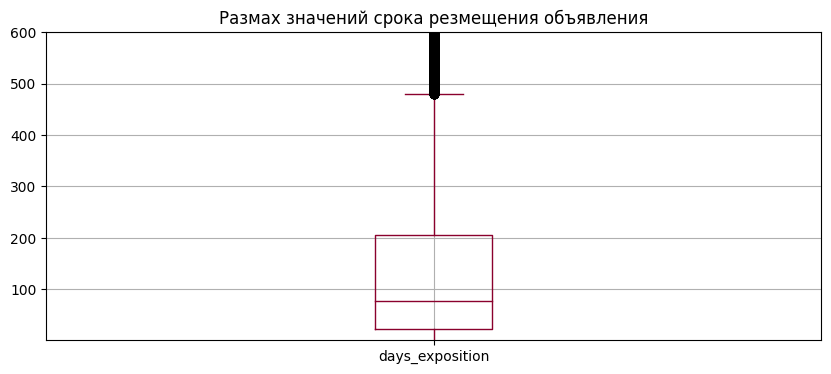

In [308]:
# Построим boxplot для колонки 'days_exposition'

data.boxplot(column='days_exposition', figsize=(10, 4), color='#8a012d')
plt.title('Размах значений срока резмещения объявления')
plt.ylim(1, 600);

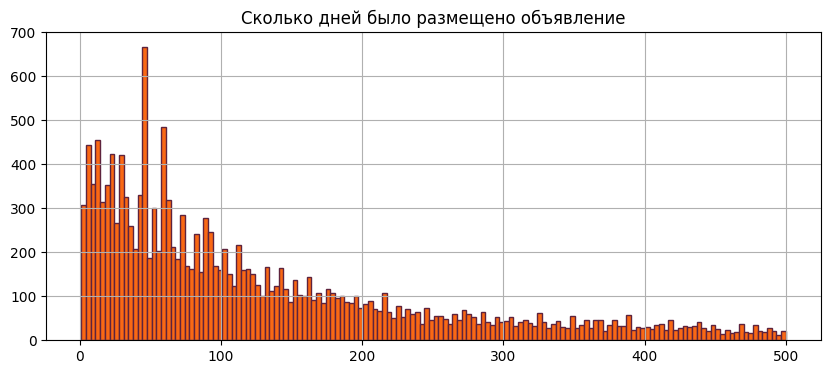

In [309]:
# Рассмотрим еще внимательнее на данные в первые 500 дней

data['days_exposition'].hist(bins=150,range=(1, 500), figsize=(10, 4), color='#FA6814', ec='#5e233d')
plt.title('Сколько дней было размещено объявление');

Объявления на сайте висят очень разное время. Некоторые квартиры продаются очень быстро, Q1 - 21 день. Нормальное время продажи квартиры, медианное значение - 79 дней. Некоторые объявления висят на сайте месяцы и годы. На это может быть много причин, например, неоправданно высокая цена или объявление могли забыть закрыть.
На гистограмме наблюдаются всплески, вероятно это связано с активностью на сайте, например при обновлении объявления.

### Изучим какие факторы больше всего влияют на общую (полную) стоимость объекта?

Интересно выяснить влияния ряда факторов на стоимость объекта (общей площади, жилой площади, площади кухни, количества комнат,
этажа, на котором расположена квартира (первый, последний, другой), даты размещения (день недели, месяц, год). Эти факторы можно разбить на 2 дипа: описание дома и квартиры и описание даты публикации.

#### Характеристики квартиры

Коэффициент корреляции Пирсона: 0.69


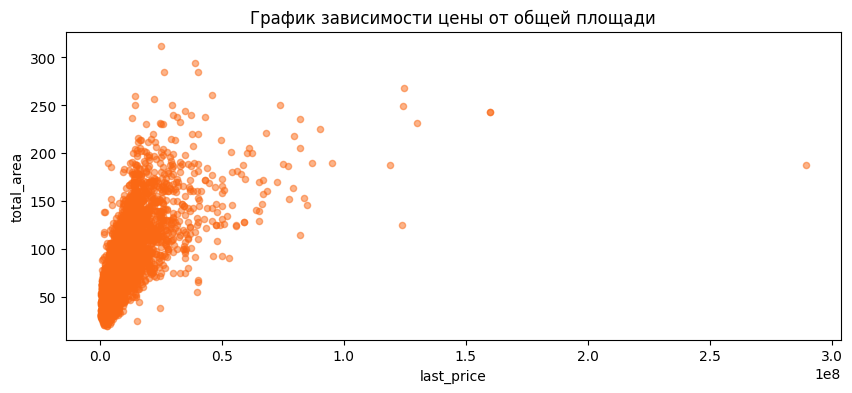

In [310]:
# Создаем график рассеяния для исследования зависимости цены от общей площади
data.plot(x='last_price', y='total_area', kind='scatter',color='#FA6814', alpha=0.5, figsize=(10, 4))
plt.title('График зависимости цены от общей площади');
corr_coef = data['last_price'].corr(data['total_area']).round(2)
print(f'Коэффициент корреляции Пирсона: {corr_coef}')

Коэффициент корреляции Пирсона: 0.59


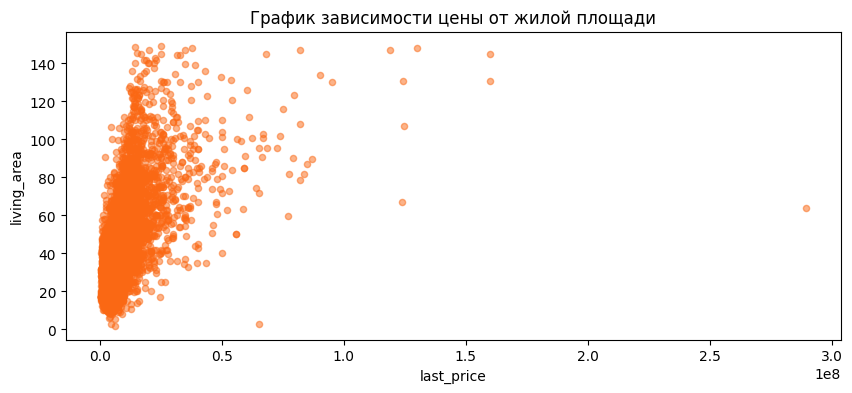

In [311]:
# Создаем график рассеяния для исследования зависимости цены от жилой площади

data.plot(x='last_price', y='living_area', kind='scatter',color='#FA6814', alpha=0.5, figsize=(10, 4))
plt.title('График зависимости цены от жилой площади');
corr_coef = data['last_price'].corr(data['living_area']).round(2)
print(f'Коэффициент корреляции Пирсона: {corr_coef}')

Коэффициент корреляции Пирсона: 0.49


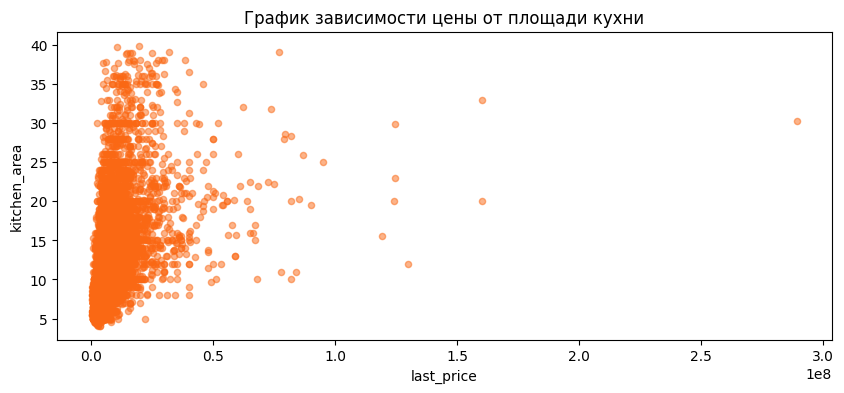

In [312]:
# Визуализация зависимости между ценой и площадью кухни с помощью диаграммы рассеяния

(
    data.
    plot(x='last_price', y='kitchen_area', kind='scatter',color='#FA6814', alpha=0.5, figsize=(10, 4))
)
plt.title('График зависимости цены от площади кухни');
corr_coef = data['last_price'].corr(data['kitchen_area']).round(2)
print(f'Коэффициент корреляции Пирсона: {corr_coef}')

Коэффициент корреляции Пирсона: 0.41


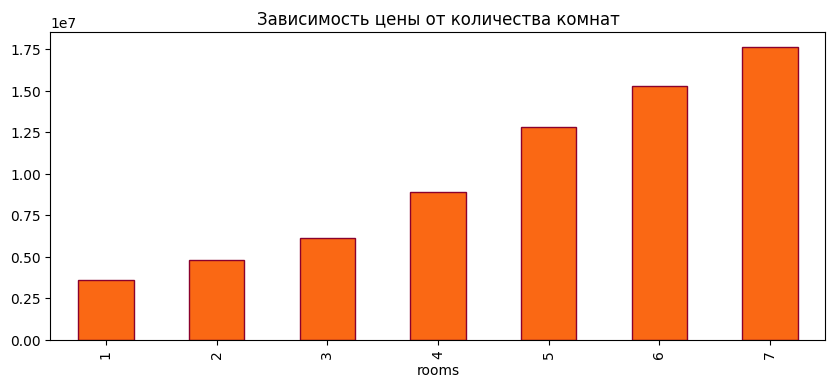

In [313]:
# Построение столбчатой диаграммы для визуализации зависимости цены от числа комнат

(
    data.
    groupby('rooms')['last_price']
    .median()
    .plot(kind='bar', figsize=(10, 4), title='Зависимость цены от количества комнат', color='#FA6814', ec='#8a012d')
);
corr_coef = data['last_price'].corr(data['rooms']).round(2)
print(f'Коэффициент корреляции Пирсона: {corr_coef}')

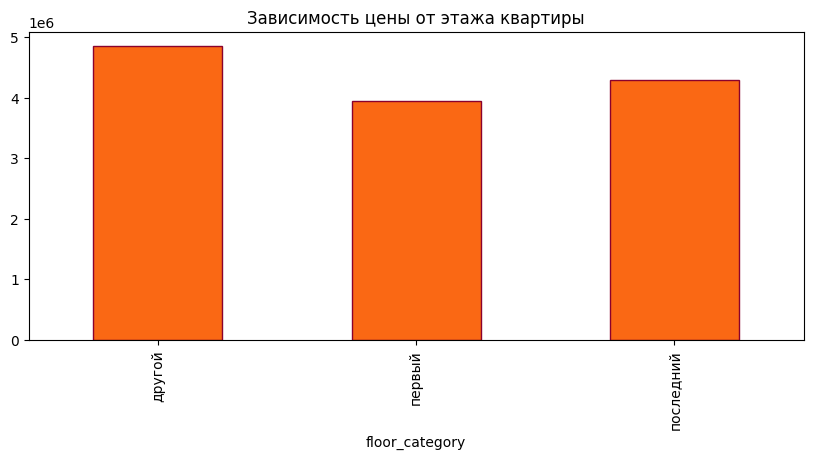

In [314]:
# Группируем данные по этажам квартир и строим столбчатую диаграмму медианных цен

(
    data.
    groupby('floor_category')['last_price']
    .median()
    .plot(kind='bar', figsize=(10, 4), title='Зависимость цены от этажa квартиры' , color='#FA6814', ec='#8a012d')
);

По приведенному графику видно, что квартиры на первом этаже дешевле всего, последние этажи несколько дороже. В основном люди предпочитают покупать другие этажи и поэтому цена за них выше.

#### Дата размещения

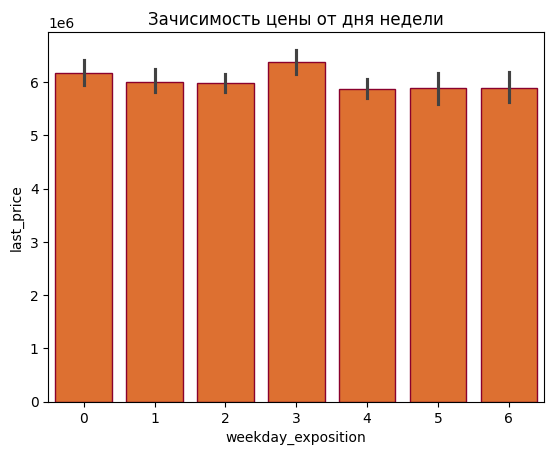

In [315]:
# Создаем столбчатую диаграмму, отображающую зависимость цены недвижимости от дня недели размещения объявления

sns.barplot(data=data, x='weekday_exposition', y='last_price', color='#FA6814', ec='#8a012d')
plt.title('Зачисимость цены от дня недели');

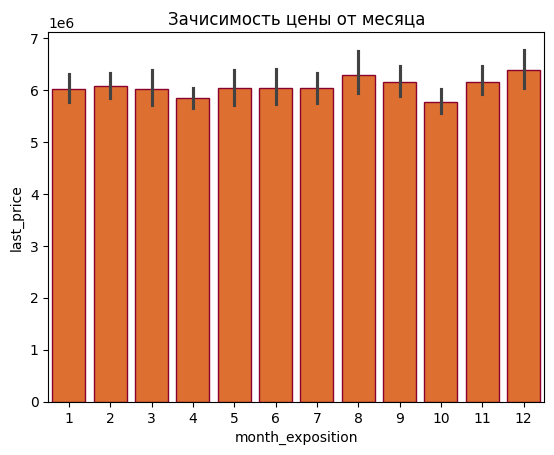

In [316]:
# Создаем график зависимости цены от месяца выкладывания объявления

sns.barplot(data=data, x='month_exposition', y='last_price', color='#FA6814', ec='#8a012d')
plt.title('Зачисимость цены от месяца');

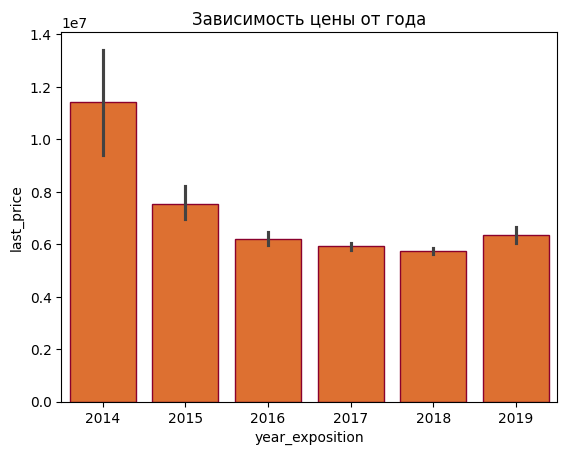

In [317]:
# Создаем график зависимости цены от года

sns.barplot(data=data, x='year_exposition', y='last_price', color='#FA6814', ec='#8a012d')
plt.title('Зависимость цены от года');

Коэффициент корреляции Пирсона характеризует существование линейной зависимости между двумя величинами. Чем ближе коэффициент корреляции Пирсона к крайним значениям 1 или -1, тем теснее линейная взаимосвязь. Рассматривая графики и значения коэффициент корреляции можно сделать вывод, что существует зависиместь между стоимостью и общей полощадью, жилой прощадью, площадью кухни, количеством комнат (коэфициенты корреляции: 0.69, 0.59, 0.49, 0.41, соответственно). Квартиры на первом и последнем этажах дешевле остальных. Не обнаружено явного влияния дня недели и месяца на стоимость квартир. Однако очевидно, что в 2014 году стоимость жилья была максимальная, в дальнейшем цена падала и начала расти в 2019 году.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделив населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [318]:
# Найдем top_10 населенных пунктов с наибольшим числом объявлений

mean_meter_price = data.pivot_table(index='locality_name', values='meter_price', aggfunc=['count', 'mean'])
mean_meter_price.columns = ['count', 'mean']
mean_meter_price.sort_values('count', ascending=False).round(1).head(10)

,count,mean
locality_name,,
санкт-петербург,13810,112390.4
поселок мурино,425,85225.5
поселок шушары,390,78379.0
всеволожск,357,69029.2
пушкин,328,102853.7
колпино,321,75129.8
гатчина,290,68635.6
поселок парголово,288,90756.0
поселок кудрово,226,92248.5


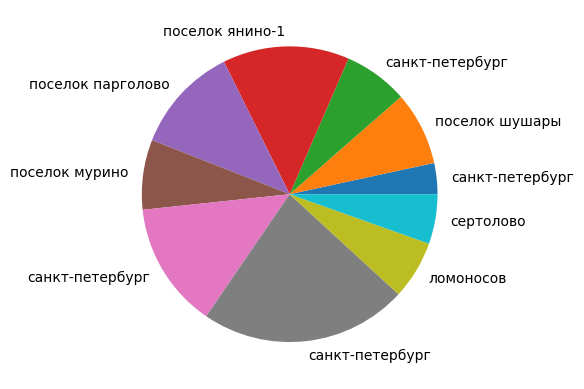

In [319]:
# Строим круговую диаграмму, представляющую среднюю цену за квадратный метр в топ-10 населенных пунктов

plt.pie(mean_meter_price['mean'].head(10), labels=data['locality_name'].head(10))
plt.show()

В городе Санкт-Петербурге 13810 объявлений это ожидаемо, 425 и 390 в Мурино и Шушарах, и это тоже ожидаемо. Это топ 3 по количеству предложений. Цены за кв. м. распределяются иначе. Самые дорогие квартиры в Санкт-Петербурге (112 тысяч за кв. м.). За ним следует Пушкин (102 тысячи за кв. м.). Дешевле всего квартиры из списка top_10 стоят в Гатчине (69 тысяч за кв.м.).

####  Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

,meter_price
city_centers_nearest_in_km,
0,160809.7
1,152038.8
2,144772.6
3,120794.9
4,132065.5
5,139800.8
6,145433.1
7,138330.9
8,119644.6


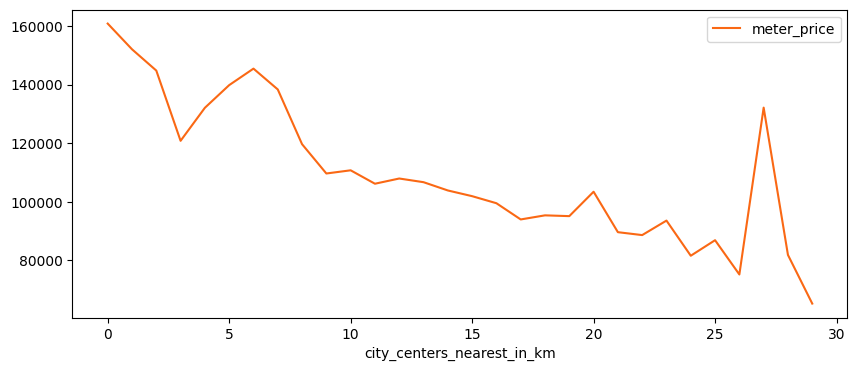

In [320]:
# Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра
# Опишем, как стоимость объектов зависит от расстояния до центра города

price_location_table = data.query('locality_name == "санкт-петербург"').pivot_table(index = 'city_centers_nearest_in_km', values = 'meter_price', aggfunc = 'mean')
price_location_table.plot(color='#FA6814', figsize=(10, 4));
price_location_table.round(1)

График иллюстрирует достаточно очевидную идею: чем ближе к центру города, тем дороже недвижимость. Наблюдается максимум на 27 км, вероятно это какой нибудь элитный населенный пункт, например город Пушкин, который вротой после Сенкт-Петербурга по количеству предложений и цене.

**************

**Вывод:**

1. Изучны некоторые параметры объектов: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления.

2. Было показано, что объявления на сайте находятся очень разное время. Имеют место быстрые продажи,  Q1 - 21 день. Нормальное время продажи квартиры, медианное значение - 79 дней. Некоторые больше года, чему может быть причиной неоправданно высокая цена или объявление могли забыть закрыть.

3. Изучено факторы больше всего влияют на общую стоимость объекта. Было показано, что характеристики квартиры (общая и жилая площадь, площадь кухни, количество комнат)влияют на цену. День недели и месяц же никак не влияет на цену. Цена на квартиры в 2014 году была максимальная, далее цена падала и начала рости в 2019 году.

4. Расчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. например средняя цена составляет 13810 тысяч на 1 кв. м. Самая дорогая недвижимость с Санкт-петербурге, самая дешевая в Гатчине.

5. Расчитана средняя цена квадратного метра на каждом километре по мере удаления от центра города. Как и ожидалось, по мере отдаления от центра цена падает.

************

## Общий вывод

*************

Были изучены данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. В первую очедь была выполнена предобработка данных, а именно:

* В ряде столбцов были обработаны пропуски.
* Были исправлены неправильно указанные типы данных.
* Проведена проверка на явные и неявные дубликаты.
* Были обработаны аномальные значения.

Далее был рассмотрен каждый из столбцов, что дало представление о содержимом таблицы:
* По возможности были удалены пропуски и заменены на подходящие значения.
* Провели категоризацию высоты потолков в зависимости от расстояния от центра города.
* Заполнили недостающие значения средними по каждой из категорий.
* Изменили тип данных там где это было необходимо.
* Данные в столбце locality_name привели к общему виду, заменили синонимы слова поселок, заменили букву ё на е, привели к единому регистру.

В таблицу были добавлены новые столбцы:
* цена одного квадратного метра
* день недели публикации объявления
* месяц публикации объявления
* год публикации объявления
* тип этажа квартиры
* расстояние до центра города в километрах

Были изучены следующие характеристики квартир: общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры , общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления.

Было показано, что объявления на сайте находятся очень разное время. Имеют место быстрые продажи, Q1 - 21 день. Нормальное время продажи квартиры, медианное значение - 79 дней. Некоторые больше года, чему может быть причиной неоправданно высокая цена или незакрытое объявление.

Изучено факторы больше всего влияющие на общую стоимость объекта. Было показано, что с увеличением общей и жилой площади, площади кухни и количества комнат увеличивается стоимость кваритиры.  Не обнаружено явного влияния дня недели и месяца на стоимость квартир. Однако очевидно, что в 2014 году стоимость жилья была максимальная, в дальнейшем цена падала и начала расти в 2019 году.

Расчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. например средняя цена составляет 13810 тысяч на 1 кв. м. Самая дорогая недвижимость с Санкт-петербурге, самая дешевая в Гатчине.

Расчитана средняя цена квадратного метра на каждом километре по мере удаления от центра города. Как и ожидалось, по мере отдаления от центра цена падает.

Для будущего более детального исследования можно детализировать данные: уточнить информацию о количестве парков, прудов, расстоянию до центра и до ближайшего аэропорта.

***************